In [1]:
% pylab inline
import pandas as pd
import numpy as np

import random
random.seed(42)

train = pd.read_csv("data/train.csv")
score = pd.read_csv("data/score.csv")
X_score = score.values[:,2:]
user_id = score.values[:,1]
X = train.values[:,3:]
y = train.values[:,2]

Populating the interactive namespace from numpy and matplotlib


In [2]:
score.head(1)

,row_number,user_id,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songs_listened,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
0,1,5,29,1,36,23.785714,0.764706,9,0,9246,...,1,0,152,0,0,0,0,81,1,0.0


In [3]:
X_score

array([[ 29.,   1.,  36., ...,  81.,   1.,   0.],
       [ 22.,   1.,   2., ...,  79.,   0.,   0.],
       [ 22.,   0.,   9., ...,  62.,   1.,   0.],
       ..., 
       [ 21.,   0.,   6., ...,  23.,   1.,   0.],
       [ 21.,   1.,  17., ...,  29.,   0.,   0.],
       [ 18.,   1.,   8., ...,  13.,   0.,   0.]])

In [4]:
score.describe()

,row_number,user_id,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songs_listened,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
count,86681.000000,8.668100e+04,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,...,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86680.000000
mean,43341.000000,8.568399e+05,24.012621,0.625108,19.330049,24.059611,0.617691,4.073292,0.440939,18057.370012,...,0.108617,-0.020350,932.254704,4.471534,0.133143,0.002457,1.171052,44.202293,0.353676,0.000265
std,25022.793679,4.941988e+05,6.393003,0.484098,73.992293,5.104065,0.318366,5.913118,1.966933,29152.584389,...,0.927222,0.568315,2763.441203,37.940155,7.466784,0.172407,22.990162,19.730629,0.478113,0.034804
min,1.000000,5.000000e+00,8.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,-30.000000,-14.000000,-104540.000000,-2230.000000,-9.000000,-8.000000,-423.000000,0.000000,0.000000,-1.000000
25%,21671.000000,4.279080e+05,20.000000,0.000000,3.000000,20.750000,0.428571,1.000000,0.000000,1306.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000
50%,43341.000000,8.561090e+05,23.000000,1.000000,7.000000,23.000000,0.666667,2.000000,0.000000,7640.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000
75%,65011.000000,1.287271e+06,26.000000,1.000000,19.000000,26.153846,0.900000,4.000000,0.000000,23327.000000,...,0.000000,0.000000,897.000000,0.000000,0.000000,0.000000,0.000000,59.000000,1.000000,0.000000
max,86681.000000,1.708981e+06,79.000000,1.000000,10868.000000,79.000000,1.000000,138.000000,181.000000,899816.000000,...,56.000000,41.000000,112577.000000,4728.000000,1496.000000,33.000000,3272.000000,112.000000,1.000000,1.000000


In [5]:
train.head(1)

,row_number,user_id,adopter,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
0,1,10,0,24,0,20,26.333333,0.777778,6,0,...,0,0,54,0,0,0,0,79,0,0


In [6]:
train.describe()

,row_number,user_id,adopter,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
count,86682.000000,8.668200e+04,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,...,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000
mean,43341.500000,8.547774e+05,0.017766,23.993067,0.622217,18.988521,24.068308,0.617246,4.040147,0.434935,...,0.105847,-0.021054,942.677188,4.716723,0.279158,0.002757,0.954500,44.350061,0.352045,0.000242
std,25023.082354,4.938304e+05,0.132101,6.388225,0.484836,57.934430,5.127068,0.318587,5.843532,1.853233,...,0.843507,0.534960,2856.036359,155.648950,43.782235,0.177153,19.209259,19.707058,0.477611,0.034803
min,1.000000,1.000000e+01,0.000000,8.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,...,-29.000000,-18.000000,-135022.000000,-951.000000,-264.000000,-5.000000,-2752.000000,0.000000,0.000000,-1.000000
25%,21671.250000,4.279675e+05,0.000000,20.000000,0.000000,3.000000,20.750000,0.428571,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000
50%,43341.500000,8.520060e+05,0.000000,23.000000,1.000000,7.000000,23.000000,0.666667,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000
75%,65011.750000,1.282592e+06,0.000000,26.000000,1.000000,18.000000,26.157895,0.900000,4.000000,0.000000,...,0.000000,0.000000,913.000000,0.000000,0.000000,0.000000,0.000000,59.000000,1.000000,0.000000
max,86682.000000,1.708942e+06,1.000000,79.000000,1.000000,6437.000000,77.000000,1.000000,122.000000,225.000000,...,41.000000,19.000000,217876.000000,44900.000000,12702.000000,20.000000,2036.000000,112.000000,1.000000,1.000000


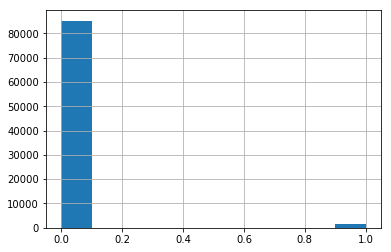

In [7]:
train.adopter.hist()

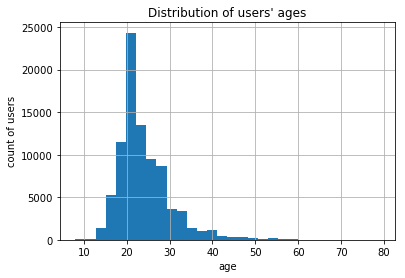

In [8]:
train.age.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age')

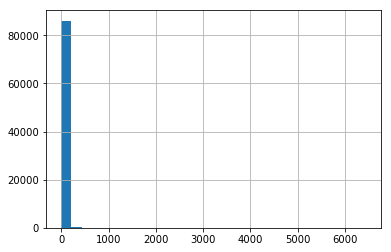

In [9]:
train.friend_count.hist(bins=30)

In [10]:
# Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)

(array([ 8503.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   166.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

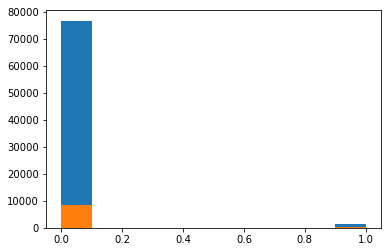

In [11]:
plt.hist(y_train)
plt.hist(y_test)

(array([ 1374.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1374.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

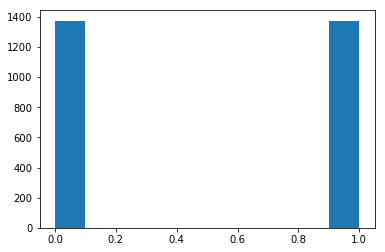

In [12]:
from imblearn.under_sampling import RandomUnderSampler

s = RandomUnderSampler()
X_sampled, y_sampled = s.fit_sample(X_train, y_train)
plt.hist(y_sampled)

In [13]:
from sklearn.preprocessing import RobustScaler
from scipy import stats
# Scale data
robust_scaler = RobustScaler()
X_train = robust_scaler.fit_transform(X_train)
data = pd.DataFrame(data=X_train)
data.columns = train.columns[3:]
data.describe()

,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songs_listened,loved_tracks,posts,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
count,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,...,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000,78013.000000
mean,0.164896,-0.377322,0.798440,0.197333,-0.104779,0.678848,0.437824,0.466225,1.021924,6.199492,...,0.106431,-0.020958,1.031496,4.841244,0.302770,0.002525,0.957840,-0.022377,0.352646,0.000218
std,1.064683,0.484720,3.850966,0.945501,0.676435,1.951009,1.892741,1.284247,4.499237,163.376520,...,0.852046,0.536241,3.154564,163.892876,46.144604,0.169621,19.688158,0.657136,0.477797,0.034896
min,-2.500000,-1.000000,-0.400000,-2.588235,-1.414141,-0.666667,0.000000,-0.349968,-0.205479,0.000000,...,-29.000000,-18.000000,-148.050439,-951.000000,-264.000000,-5.000000,-2752.000000,-1.500000,0.000000,-1.000000
25%,-0.500000,-1.000000,-0.266667,-0.415966,-0.505051,-0.333333,0.000000,-0.289713,-0.191781,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.533333,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.000000,0.733333,0.584034,0.494949,0.666667,0.000000,0.710287,0.808219,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.466667,1.000000,0.000000
max,9.333333,0.000000,428.666667,9.428571,0.707071,39.000000,225.000000,41.157097,772.246575,25815.000000,...,41.000000,19.000000,238.899123,44900.000000,12702.000000,20.000000,2036.000000,2.233333,1.000000,1.000000


In [14]:
# Scale data
robust_scaler = RobustScaler()
X_feature = robust_scaler.fit_transform(X_sampled)
data = pd.DataFrame(data=X_feature)
data.columns = train.columns[3:]
data.describe()

,age,is_male,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songs_listened,loved_tracks,posts,...,delta_friend_country_cnt,delta_subscriber_friend_cnt,delta_songs_listened,delta_loved_tracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country
count,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,...,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000
mean,0.306041,-0.338792,0.702496,0.161655,-0.124287,0.501965,0.933770,0.379184,0.740111,12.038210,...,0.211426,-0.032387,0.651148,2.431587,0.273290,0.004003,3.197598,-0.029677,0.307860,0.000000
std,1.087858,0.473385,2.592019,0.914089,0.763948,1.510081,2.513882,1.135462,2.500323,127.358846,...,1.186958,0.814886,1.750742,9.974173,6.428792,0.189798,43.847203,0.681512,0.461692,0.046735
min,-2.500000,-1.000000,-0.416667,-1.770274,-1.769098,-0.600000,0.000000,-0.447010,-0.280120,0.000000,...,-9.000000,-14.000000,-20.061384,-89.750000,0.000000,-3.000000,-81.000000,-1.448276,0.000000,-1.000000
25%,-0.333333,-1.000000,-0.291667,-0.450177,-0.557725,-0.400000,0.000000,-0.339244,-0.250000,0.000000,...,0.000000,0.000000,-0.133299,0.000000,0.000000,0.000000,0.000000,-0.517241,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.000000,0.708333,0.549823,0.442275,0.600000,1.000000,0.660756,0.750000,1.000000,...,0.000000,0.000000,0.866701,1.000000,0.000000,0.000000,0.000000,0.482759,1.000000,0.000000
max,8.333333,0.000000,60.333333,7.888132,0.884549,16.000000,55.000000,12.696627,61.478916,4663.000000,...,21.000000,8.000000,34.390908,147.500000,281.000000,5.000000,2036.000000,2.103448,1.000000,1.000000


In [15]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_fscore_support, classification_report

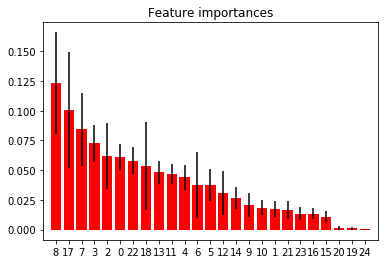

Precision:0.0190081637626 Recall:0.939759036145, FScore:0.0372626298818
[[ 452 8051]
 [  10  156]]


In [16]:
from sklearn.ensemble import RandomForestClassifier

forest_adopter = RandomForestClassifier(n_estimators=45, random_state=42)
forest_adopter.fit(X_feature, y_sampled)
importances = forest_adopter.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_adopter.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

y_pred = forest_adopter.predict(X_test)
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

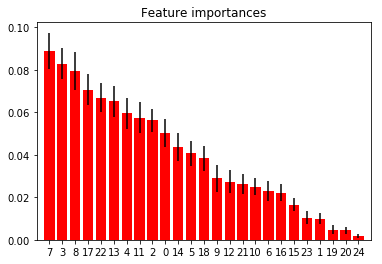

Precision:0.0851063829787 Recall:0.0240963855422, FScore:0.037558685446
[[8460   43]
 [ 162    4]]


In [17]:
from sklearn.ensemble import RandomForestClassifier

forest_nonadopter = RandomForestClassifier(n_estimators=45, random_state=42)
forest_nonadopter.fit(X_train, y_train)
importances = forest_nonadopter.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_nonadopter.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

y_pred = forest_nonadopter.predict(X_test)
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

In [18]:
top_feature_count = 15
arr_adopter = forest_adopter.feature_importances_
top_features_adopter = arr_adopter.argsort()[-top_feature_count:][::-1]

arr_nonadopter = forest_nonadopter.feature_importances_
top_features_nonadopter = arr_nonadopter.argsort()[-top_feature_count:][::-1]

top_features = list(set(top_features_nonadopter)|set(top_features_adopter))

train_top_features = map(lambda x: x+3, top_features)
score_top_features = map(lambda x: x+2, top_features)

print train_top_features
print score_top_features

X_score = score.values[:,score_top_features]

[3, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 20, 21, 25]
[2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 19, 20, 24]


In [19]:
data2 = pd.DataFrame(data=X_score)
data2.columns = train.columns[train_top_features]
data2.describe()

,age,friend_count,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songs_listened,loved_tracks,posts,shouts,delta_friend_cnt,delta_avg_friend_age,delta_avg_friend_male,delta_songs_listened,delta_loved_tracks,tenure
count,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000,86681.000000
mean,24.012621,19.330049,24.059611,0.617691,4.073292,0.440939,18057.370012,92.552266,5.521175,31.698319,0.896932,0.270479,-0.000243,932.254704,4.471534,44.202293
std,6.393003,73.992293,5.104065,0.318366,5.913118,1.966933,29152.584389,379.560208,80.306180,193.717694,8.923235,0.719881,0.050965,2763.441203,37.940155,19.730629
min,8.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-211.000000,-48.833333,-1.000000,-104540.000000,-2230.000000,0.000000
25%,20.000000,3.000000,20.750000,0.428571,1.000000,0.000000,1306.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,23.000000,7.000000,23.000000,0.666667,2.000000,0.000000,7640.000000,15.000000,0.000000,4.000000,0.000000,0.244444,0.000000,0.000000,0.000000,44.000000
75%,26.000000,19.000000,26.153846,0.900000,4.000000,0.000000,23327.000000,75.000000,0.000000,15.000000,0.000000,0.447205,0.000000,897.000000,0.000000,59.000000
max,79.000000,10868.000000,79.000000,1.000000,138.000000,181.000000,899816.000000,59328.000000,11245.000000,20608.000000,880.000000,28.000000,1.000000,112577.000000,4728.000000,112.000000


In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion="gini", max_features="log2", n_estimators=45)
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("random_forest")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%s,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.0561797752809 Recall:0.0602409638554, FScore:0.0581395348837
[[8335  168]
 [ 156   10]]


In [21]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("extra_trees")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%d,%d\n" % (user_id[i],prediction))
        i += 1

/Users/ryan.andorfer/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision:0.0 Recall:0.0, FScore:0.0
[[8503    0]
 [ 166    0]]


In [22]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("k_neighbors")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%s,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.0 Recall:0.0, FScore:0.0
[[8503    0]
 [ 166    0]]


In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("discriminant_analysis")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%s,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.0205980890929 Recall:1.0, FScore:0.0403647416413
[[ 610 7893]
 [   0  166]]


In [24]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("naive_bayes")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%s,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.0192085165471 Recall:1.0, FScore:0.0376930063579
[[  27 8476]
 [   0  166]]


In [25]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train[:,top_features], y_train)
y_pred = model.predict(X_test[:,top_features])
precision, recall, fbeta_score, support = precision_recall_fscore_support(
    y_true=y_test, y_pred=y_pred, labels=1, average='binary'
)
print("Precision:{0} Recall:{1}, FScore:{2}").format(precision, recall, fbeta_score)
print confusion_matrix(y_test,y_pred)

predictions = model.predict(X_score)
file_name = "{0}.csv".format("ada_boost")
with open(file_name, 'w') as csvfile:
    csvfile.write("user_id,prediction(adopter)\n")
    i=0
    for prediction in predictions:
        csvfile.write("%s,%d\n" % (user_id[i],prediction))
        i += 1

Precision:0.0760869565217 Recall:0.0421686746988, FScore:0.0542635658915
[[8418   85]
 [ 159    7]]


In [2]:
import optunity
import optunity.metrics

# k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
# support vector machine classifier
from sklearn.svm import SVC
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Random Forest
from sklearn.ensemble import RandomForestClassifier


In [3]:
def train_svm(data, labels, kernel, C, gamma, degree, coef0):
    """A generic SVM training function, with arguments based on the chosen kernel."""
    if kernel == 'linear':
        model = SVC(kernel=kernel, C=C)
    elif kernel == 'poly':
        model = SVC(kernel=kernel, C=C, degree=degree, coef0=coef0)
    elif kernel == 'rbf':
        model = SVC(kernel=kernel, C=C, gamma=gamma, n_jobs=-1)
    else:
        raise ArgumentError("Unknown kernel function: %s" % kernel)
    model.fit(data, labels)
    return model

In [4]:
search = {'algorithm': {'k-nn': {'n_neighbors': [1, 5]},
                        'SVM': {'kernel': {'linear': {'C': [0, 2]},
                                           'rbf': {'gamma': [0, 1], 'C': [0, 10]},
                                           'poly': {'degree': [2, 5], 'C': [0, 50], 'coef0': [0, 1]}
                                           }
                                },
                        'naive-bayes': None,
                        'random-forest': {'n_estimators': [10, 30],
                                          'max_features': [5, 20]}
                        }
         }

@optunity.cross_validated(x=X, y=y, num_folds=5)
def performance(x_train, y_train, x_test, y_test,
                algorithm, n_neighbors=None, n_estimators=None, max_features=None,
                kernel=None, C=None, gamma=None, degree=None, coef0=None):
    # fit the model
    if algorithm == 'k-nn':
        model = KNeighborsClassifier(n_neighbors=int(n_neighbors),n_jobs=-1)
        model.fit(x_train, y_train)
    elif algorithm == 'SVM':
        model = train_svm(x_train, y_train, kernel, C, gamma, degree, coef0)
    elif algorithm == 'naive-bayes':
        model = GaussianNB()
        model.fit(x_train, y_train)
    elif algorithm == 'random-forest':
        model = RandomForestClassifier(n_estimators=int(n_estimators),
                                       max_features=int(max_features),n_jobs=-1)
        model.fit(x_train, y_train)
    else:
        raise ArgumentError('Unknown algorithm: %s' % algorithm)

    # predict the test set
    if algorithm == 'SVM':
        predictions = model.decision_function(x_test)
    else:
        predictions = model.predict_proba(x_test)[:, 1]

    return optunity.metrics.roc_auc(y_test, predictions, positive=True)

In [5]:
performance(algorithm='k-nn', n_neighbors=3)

0.5304992960585894

In [ ]:
optimal_configuration, info, _ = optunity.maximize_structured(performance,
                                                              search_space=search,
                                                              num_evals=5)
print(optimal_configuration)
print(info.optimum)
solution = dict([(k, v) for k, v in optimal_configuration.items() if v is not None])
print('Solution\n========')
print("\n".join(map(lambda x: "%s \t %s" % (x[0], str(x[1])), solution.items())))